In [178]:
from __future__ import print_function
from keras.layers import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.constraints import max_norm
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np



shIndex=pd.read_csv("C:/Users/yang/Downloads/shIndex.csv")
BATCH_SIZE=10
timeLen=5 #如果分析周期为11，前10个交易日预测下一个交易日
pos=0
X=np.zeros((len(shIndex['Close'])-timeLen,timeLen,1),dtype=np.float)
Y=np.zeros((len(shIndex['Close'])-timeLen),dtype=np.float)
while pos<len(shIndex['Close'])-timeLen:
    Y[pos]=shIndex['Close'][pos+timeLen]
    for j in range(0,timeLen):
        X[pos,j,0]=shIndex['Close'][pos:pos+timeLen][j+pos]
    pos=pos+1 
X_origin=X
Y_origin=Y
min_max_scaler=MinMaxScaler()
X[...,0]=min_max_scaler.fit_transform(X[...,0])
Y = min_max_scaler.fit_transform(Y.reshape(-1,1))

model = Sequential()
model.add(LSTM(120,input_shape=(timeLen,1),stateful=False,return_sequences=False,kernel_initializer='random_uniform'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("tanh"))


sp = int(0.9 * X.shape[0])
Xtrain, Xtest, Ytrain, Ytest = X[0:sp], X[sp:], Y[0:sp], Y[sp:]
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
model.compile(loss="mse", optimizer="Adam")
#model.fit(X,Y,epochs=200,batch_size=80,validation_split=0.1)
model.fit(Xtrain,Ytrain,epochs=200,validation_data=(Xtest,Ytest),shuffle=True)
#Y=min_max_scaler.inverse_transform(Y)
Y_pred_lstm1=min_max_scaler.inverse_transform(model.predict(X))


(976, 5, 1) (109, 5, 1) (976, 1) (109, 1)
Train on 976 samples, validate on 109 samples
Epoch 1/200
976/976 [==============================] - 9s 9ms/step - loss: 0.0255 - val_loss: 0.0033
Epoch 2/200
976/976 [==============================] - ETA: 0s - loss: 0.004 - 0s 384us/step - loss: 0.0042 - val_loss: 0.0012
Epoch 3/200
976/976 [==============================] - 0s 361us/step - loss: 0.0022 - val_loss: 7.6340e-04
Epoch 4/200
976/976 [==============================] - 0s 367us/step - loss: 0.0019 - val_loss: 8.4120e-04
Epoch 5/200
976/976 [==============================] - 0s 358us/step - loss: 0.0017 - val_loss: 6.5375e-04
Epoch 6/200
976/976 [==============================] - 0s 362us/step - loss: 0.0016 - val_loss: 7.1962e-04
Epoch 7/200
976/976 [==============================] - 0s 380us/step - loss: 0.0016 - val_loss: 0.0011
Epoch 8/200
976/976 [==============================] - 0s 369us/step - loss: 0.0016 - val_loss: 0.0010
Epoch 9/200
976/976 [=============================

976/976 [==============================] - 0s 360us/step - loss: 8.6188e-04 - val_loss: 4.2751e-04
Epoch 75/200
976/976 [==============================] - 0s 360us/step - loss: 8.5997e-04 - val_loss: 4.3811e-04
Epoch 76/200
976/976 [==============================] - 0s 363us/step - loss: 7.4494e-04 - val_loss: 3.9689e-04
Epoch 77/200
976/976 [==============================] - 0s 368us/step - loss: 8.9859e-04 - val_loss: 4.5383e-04
Epoch 78/200
976/976 [==============================] - 0s 366us/step - loss: 8.9168e-04 - val_loss: 2.9751e-04
Epoch 79/200
976/976 [==============================] - 0s 361us/step - loss: 8.1902e-04 - val_loss: 3.3819e-04
Epoch 80/200
976/976 [==============================] - 0s 356us/step - loss: 8.3957e-04 - val_loss: 2.8774e-04
Epoch 81/200
976/976 [==============================] - 0s 362us/step - loss: 8.3124e-04 - val_loss: 3.7497e-04
Epoch 82/200
976/976 [==============================] - 0s 363us/step - loss: 7.9514e-04 - val_loss: 4.0340e-04
Epoch

Epoch 147/200
976/976 [==============================] - 0s 366us/step - loss: 7.7911e-04 - val_loss: 2.8224e-04
Epoch 148/200
976/976 [==============================] - 0s 377us/step - loss: 7.2018e-04 - val_loss: 3.5295e-04
Epoch 149/200
976/976 [==============================] - 0s 372us/step - loss: 8.1351e-04 - val_loss: 4.5107e-04
Epoch 150/200
976/976 [==============================] - 0s 360us/step - loss: 8.0670e-04 - val_loss: 2.9159e-04
Epoch 151/200
976/976 [==============================] - 0s 368us/step - loss: 7.5899e-04 - val_loss: 3.8737e-04
Epoch 152/200
976/976 [==============================] - 0s 383us/step - loss: 6.6872e-04 - val_loss: 2.8808e-04
Epoch 153/200
976/976 [==============================] - 0s 372us/step - loss: 7.8181e-04 - val_loss: 2.5700e-04
Epoch 154/200
976/976 [==============================] - 0s 356us/step - loss: 6.9576e-04 - val_loss: 2.7274e-04
Epoch 155/200
976/976 [==============================] - 0s 358us/step - loss: 7.1038e-04 - val_

In [179]:
model = Sequential()
model.add(LSTM(100,input_shape=(timeLen,1),batch_input_shape=(BATCH_SIZE,timeLen,1),stateful=False,return_sequences=False,kernel_initializer='random_uniform'))
#model.add(LSTM(100,input_shape=(timeLen,1),return_sequences=False,kernel_initializer='random_uniform'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("tanh"))

sp = int(0.9 * X.shape[0])
Xtrain, Xtest, Ytrain, Ytest = X[0:sp], X[sp:], Y[0:sp], Y[sp:]
train_size = (Xtrain.shape[0]// BATCH_SIZE) * BATCH_SIZE
test_size = (Xtest.shape[0] // BATCH_SIZE) * BATCH_SIZE
Xtrain,Ytrain = Xtrain[0:train_size],Ytrain[0:train_size]
Xtest,Ytest = Xtest[0:test_size],Ytest[0:test_size]
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
model.compile(loss="mse", optimizer="Adam")
#model.fit(X,Y,epochs=200,batch_size=80,validation_split=0.1)
model.fit(Xtrain,Ytrain,epochs=200,batch_size=BATCH_SIZE,validation_data=(Xtest,Ytest),shuffle=True)
Y_pred_lstm2=np.zeros(shape=(train_size+test_size,1))
i=0
while i<train_size+test_size:
    Y_pred_lstm2[i:i+10]=min_max_scaler.inverse_transform(model.predict(X[i:i+10]))
    i=i+10
Y_pred_lstm2.shape

(970, 5, 1) (100, 5, 1) (970, 1) (100, 1)
Train on 970 samples, validate on 100 samples
Epoch 1/200
970/970 [==============================] - 9s 9ms/step - loss: 0.0166 - val_loss: 0.0013
Epoch 2/200
970/970 [==============================] - 1s 770us/step - loss: 0.0020 - val_loss: 9.0914e-04
Epoch 3/200
970/970 [==============================] - 1s 766us/step - loss: 0.0019 - val_loss: 7.8939e-04
Epoch 4/200
970/970 [==============================] - 1s 759us/step - loss: 0.0015 - val_loss: 6.1383e-04
Epoch 5/200
970/970 [==============================] - 1s 768us/step - loss: 0.0015 - val_loss: 9.1934e-04
Epoch 6/200
970/970 [==============================] - 1s 766us/step - loss: 0.0018 - val_loss: 0.0012
Epoch 7/200
970/970 [==============================] - 1s 821us/step - loss: 0.0016 - val_loss: 6.7363e-04
Epoch 8/200
970/970 [==============================] - 1s 811us/step - loss: 0.0015 - val_loss: 6.9500e-04
Epoch 9/200
970/970 [==============================] - 1s 787us/st

970/970 [==============================] - 1s 804us/step - loss: 9.1426e-04 - val_loss: 2.9989e-04
Epoch 76/200
970/970 [==============================] - 1s 780us/step - loss: 9.8275e-04 - val_loss: 3.2922e-04
Epoch 77/200
970/970 [==============================] - 1s 767us/step - loss: 7.8614e-04 - val_loss: 2.8266e-04
Epoch 78/200
970/970 [==============================] - 1s 764us/step - loss: 8.4728e-04 - val_loss: 3.6499e-04
Epoch 79/200
970/970 [==============================] - 1s 793us/step - loss: 9.1010e-04 - val_loss: 3.5513e-04
Epoch 80/200
970/970 [==============================] - 1s 774us/step - loss: 9.6446e-04 - val_loss: 3.2351e-04
Epoch 81/200
970/970 [==============================] - 1s 783us/step - loss: 0.0011 - val_loss: 3.2001e-04
Epoch 82/200
970/970 [==============================] - 1s 748us/step - loss: 9.0993e-04 - val_loss: 3.7029e-04
Epoch 83/200
970/970 [==============================] - 1s 808us/step - loss: 7.5650e-04 - val_loss: 5.0737e-04
Epoch 84/

Epoch 148/200
970/970 [==============================] - 1s 797us/step - loss: 8.0506e-04 - val_loss: 2.8167e-04
Epoch 149/200
970/970 [==============================] - 1s 782us/step - loss: 7.7295e-04 - val_loss: 3.4834e-04
Epoch 150/200
970/970 [==============================] - 1s 812us/step - loss: 8.0370e-04 - val_loss: 3.4292e-04
Epoch 151/200
970/970 [==============================] - 1s 774us/step - loss: 8.0106e-04 - val_loss: 3.0779e-04
Epoch 152/200
970/970 [==============================] - 1s 772us/step - loss: 7.1475e-04 - val_loss: 3.7269e-04
Epoch 153/200
970/970 [==============================] - 1s 783us/step - loss: 7.3583e-04 - val_loss: 3.1961e-04
Epoch 154/200
970/970 [==============================] - 1s 835us/step - loss: 7.4040e-04 - val_loss: 4.1488e-04
Epoch 155/200
970/970 [==============================] - 1s 799us/step - loss: 6.7557e-04 - val_loss: 3.6567e-04
Epoch 156/200
970/970 [==============================] - 1s 780us/step - loss: 7.9536e-04 - val_

(1070, 1)

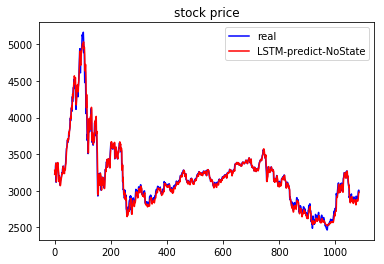

In [180]:
plt.figure()
plt.title("stock price")
plt.plot(Y_origin,'b',label='real')
plt.plot(Y_pred_lstm1,'r',label='LSTM-predict-NoState')
plt.legend()
plt.show()

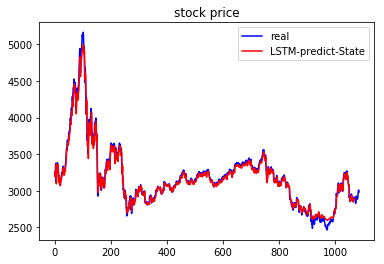

In [181]:
plt.figure()
plt.title("stock price")
plt.plot(Y_origin,'b',label='real')
plt.plot(Y_pred_lstm2,'r',label='LSTM-predict-State')
plt.legend()
plt.show()

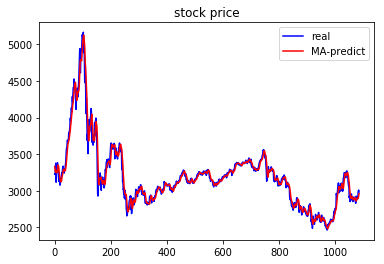

In [183]:
ma5=np.mean(X,axis=1)
ma5=min_max_scaler.inverse_transform(ma5)
plt.figure()
plt.title("stock price")
plt.plot(Y_origin,'b',label='real')
plt.plot(ma5,'r',label='MA-predict')
plt.legend()
plt.show()